# Лабораторная 5
# Решающие деревья и случайные леса

## Лабораторная 5.2. Применение ансамблевых моделей на базе решающих деревьев в задачах классификации

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 1.
Решим задачу классификации  больных методом случайного леса.

1. Провеведем исследование качества модели от глубины используемых деревьев и отрисуем зависимость на графике
2. Проведем исследование качества модели от количества подаваемых на дерево признаков и отрисуем зависимость на графике
3. Проведем исследование качества модели от числа деревьев и отрисуем зависмость на графике, а также дополним  график данными  о времени обучения.

В качестве измерителя качества модели возьмем ```f1_score```

Подключим наш датасет - ```diabetes```.

In [5]:
from sklearn.metrics import f1_score

data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv', sep=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Исследуем зависимость глубины деревьев от меры ```f1```

In [8]:
from sklearn.ensemble import RandomForestClassifier

f1_scores_depthes = list()
depthes = (3, 7, 10, 15, 20, 30, 47, 70, 90, 110)
for depth in depthes:
    model = RandomForestClassifier(max_depth=depth).fit(X_train, y_train)
    predicted = model.predict(X_test)
    f1_scores_depthes.append(f1_score(y_test, predicted))

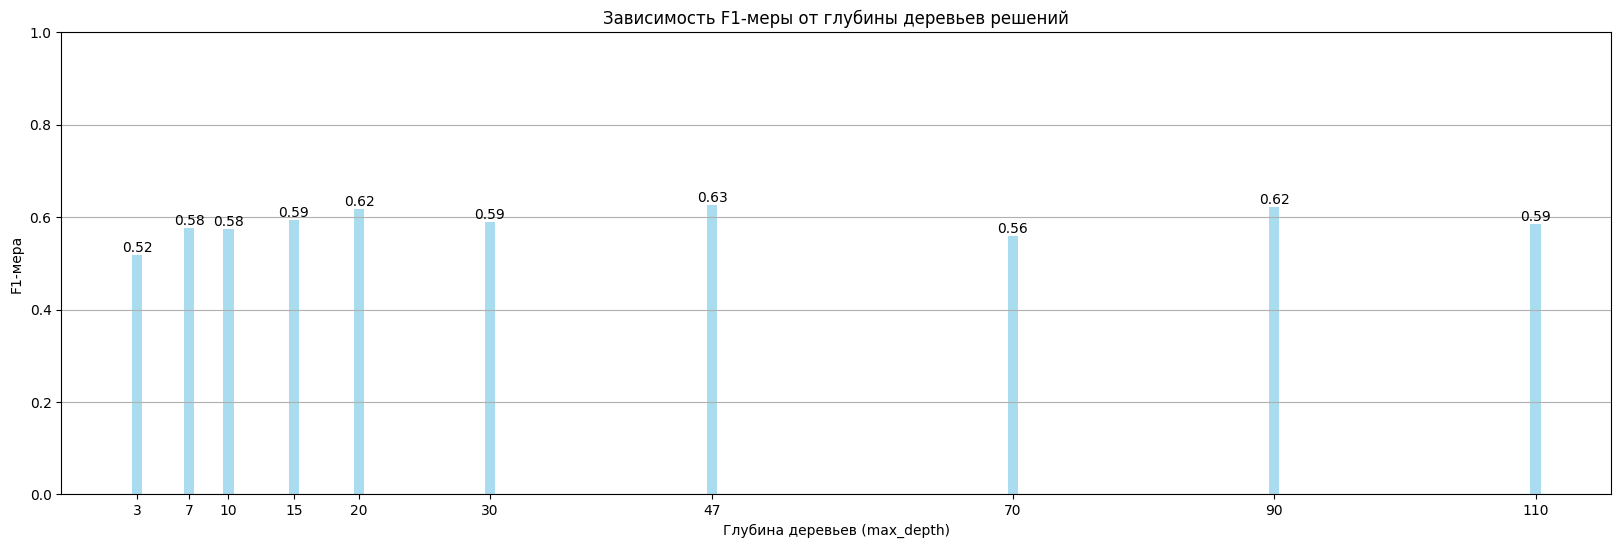

In [11]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(depthes, f1_scores_depthes, color='skyblue', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от глубины деревьев решений')
plt.xlabel('Глубина деревьев (max_depth)')
plt.ylabel('F1-мера')
plt.xticks(depthes)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

Видим, что лучший показатель при ```max_depth = 47``` - ```0.63```, но есть не хуже показатель при ```max_depth = 20``` и ```max_depth = 90``` - ```0.62```. В целом эти показатели не особо хорошие и не превосходят показатели обычного решающего дерева, где максимум был в ```0.62``` при ```max_depth = 12```

Исследуем зависимость признаков деревьев от меры ```f1```

In [15]:
f1_scores_features = list()
features = (1, 2, 3, 4, 5, 6, 7, 8)
for feature in features:
    model = RandomForestClassifier(max_features=feature).fit(X_train, y_train)
    predicted = model.predict(X_test)
    f1_scores_features.append(f1_score(y_test, predicted))

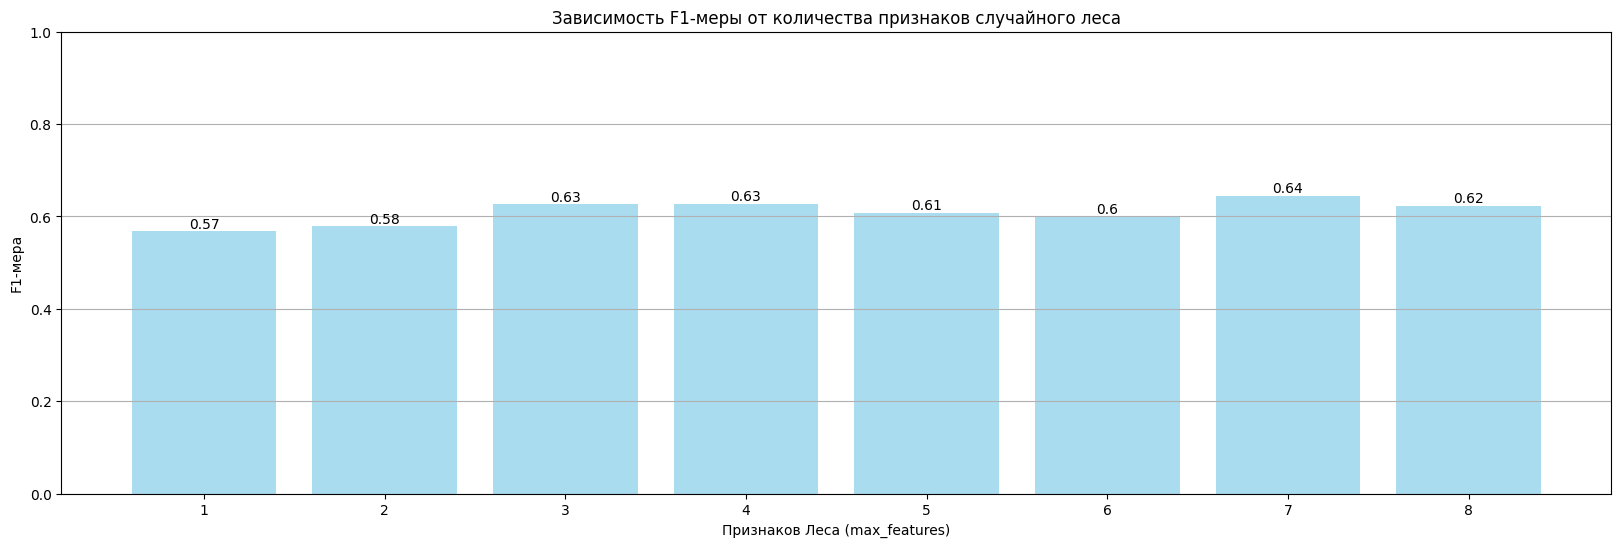

In [16]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(features, f1_scores_features, color='skyblue', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от количества признаков случайного леса')
plt.xlabel('Признаков Леса (max_features)')
plt.ylabel('F1-мера')
plt.xticks(features)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

Мы обучили модели для разного количества признаков и результаты получились почти равные, за исключением количества признаков 1 и 2. 

Что интересно относительно хорошей точностью относительно моделей с другим количеством признаков обладает модель с максимальным количеством признаков равным всего 3.

Тем не менее мы не добиваемся хороших показателей точности.

Исследуем зависимость количества деревьев от меры ```f1``` с измерением времени обучения

In [17]:
from time import time

f1_scores_estimators = list()
time_estimators = list()
estimators = (3, 7, 10, 15, 20, 30, 47, 60, 80, 100)
for estimator in estimators:
    start = time()
    model = RandomForestClassifier(n_estimators=estimator).fit(X_train, y_train)
    estimator_time = time() - start
    predicted = model.predict(X_test)
    f1_scores_estimators.append(f1_score(y_test, predicted))
    time_estimators.append(estimator_time)

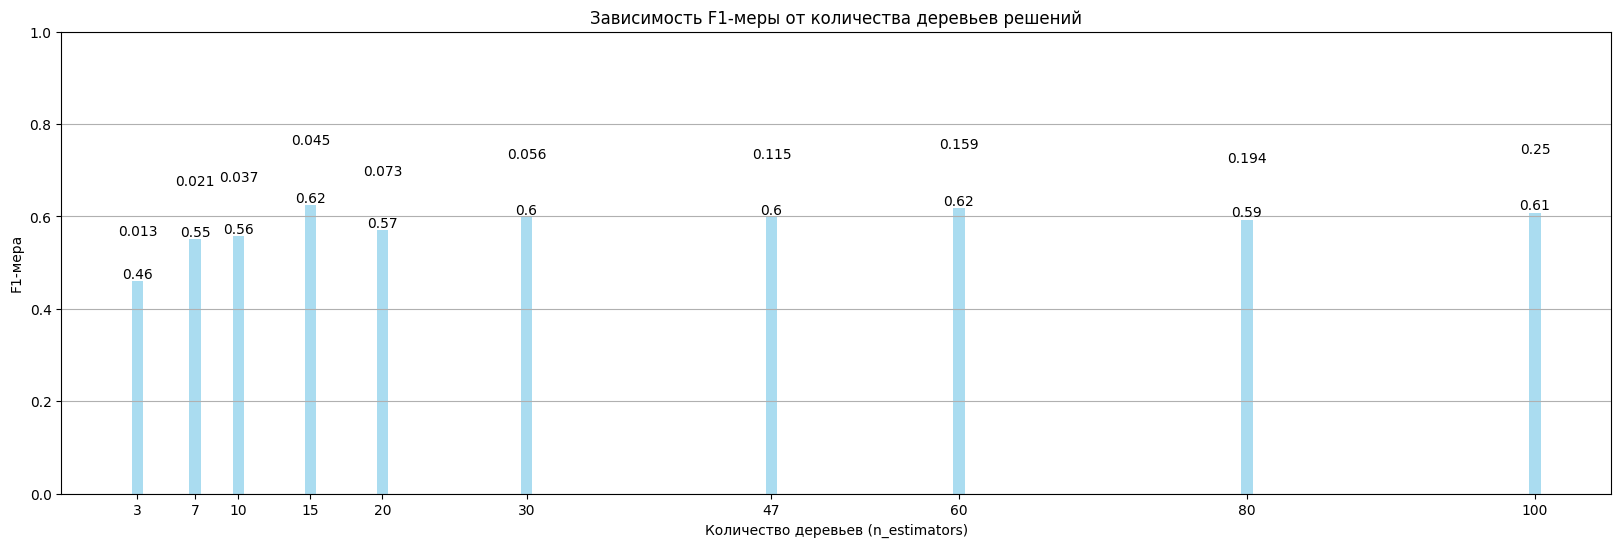

In [25]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(estimators, f1_scores_estimators, color='skyblue', alpha=0.7)
    
# Добавление значений времени и f1 над столбцами
for i in range(len(bars)):
    yval = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yval + yval/5, round(time_estimators[i], 3), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от количества деревьев решений')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('F1-мера')
plt.xticks(estimators)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

Итак, мы видим, что максимальная точность достигнута при ```n_estimators = 15``` достигнут за ```0.045``` сек. значения ```0.62```. Видим, что чем больше количества деревьев в лесу, тем дольше выполнятеся обучение, так при количестве 100 выполнение обучение заняло четверть секунды.

Попробуем взять лучшие гиперпараметры и посмотреть на ```f1_score``` и ```Roc-Auc``` нашей модели.

In [27]:
from sklearn.metrics import roc_curve, auc

model_best_parametrs = RandomForestClassifier(n_estimators=15, max_features=7, max_depth=20).fit(X_train, y_train)

In [30]:
model_best_parametrs.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

f1_score =  0.6282051282051282
ROC-AUC =  0.7240196078431373


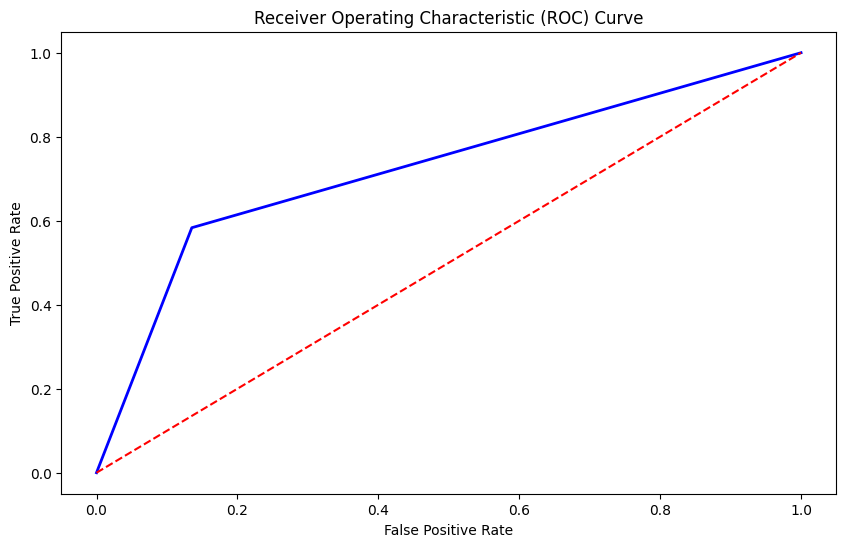

In [32]:
y_pred_best_params = model_best_parametrs.predict(X_test)

f1_score_best_params = f1_score(y_test, y_pred_best_params)

# Вычисление FPR и TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_params)

# Вычисление площади под ROC-кривой
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('f1_score = ', f1_score_best_params)
print('ROC-AUC = ', roc_auc)

Как и следовало ожидать, показатель не стал равным единице, он равен ```f1_score = 0.62```, возможно, он усреднился. Показатель ```Roc-Auc = 0.72```, что лучше чем в случае решающего дерева (```0.70```), однако недостаточно для того, чтобы считать модель хорошей